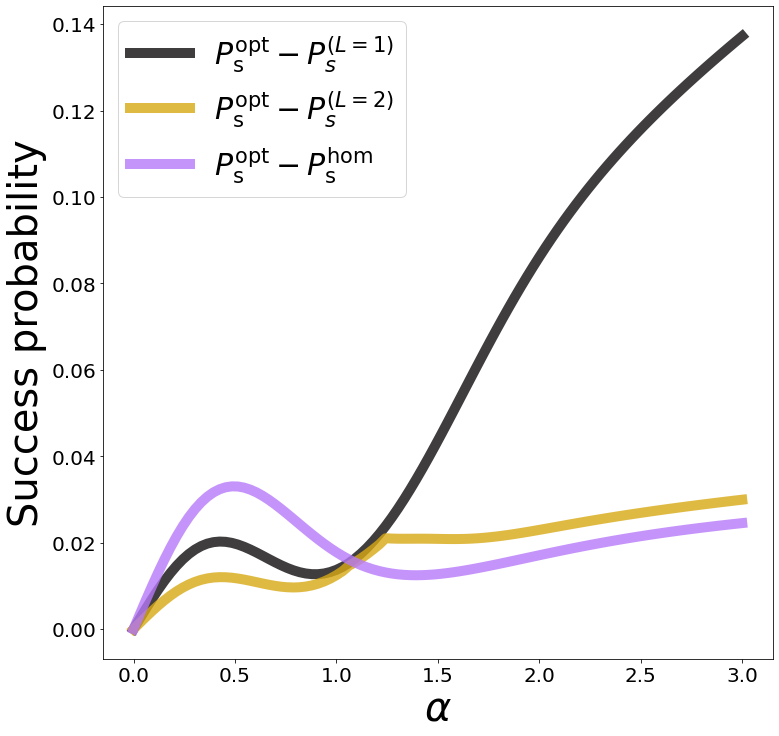

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os


amps=np.linspace(0,3,100)
ind=len(amps)



channels = {}
channels[1] = [[.5,.5],[.01,1]]
channels[2] = [[.5,.5],[.9, 1.]]
channels[3] = [[.5,.5],[.5, .55]]
channels[4] = [[.5,.5],[.001, 1.]]
channels[5] = [[.5,.5],[.00001, 1.]]
channels[6] = [[.5,.5],[.000001, 1.]]
channels[7] = [[.5,.5],[.5, .9]]
channels[8] = [[.5,.5],[.3, .4]]
channels[9] = [[.5,.5],[.3, .5]]

for caseid in range(1,2):

    colors={"1L":list(np.array([15,12,12])/255.),
           "2L":list(np.array([216,169,20])/255.),
           "H": list(np.array([183,121,249])/255.)}

    s2=np.load("data_cases/{}/ar_2L_s.npy".format(caseid))
    fun2=np.load("data_cases/{}/ar_2L_betas.npy".format(caseid))#,fun2)
    s1=np.load("data_cases/{}/ar_1L_s.npy".format(caseid))#,s1)
    fun1=np.load("data_cases/{}/ar_1L_betas.npy".format(caseid))#,fun1)
    homodynes_values=np.load("data_cases/{}/homodynes.npy".format(caseid))#,homodynes_values)
    helstroms_values=np.load("data_cases/{}/helstroms.npy".format(caseid))#,helstroms_values)


    lw=10
    al=0.8
    fig1=plt.figure(figsize=(12,12))
    plt.plot(amps,helstroms_values-s1, color=colors["1L"], linewidth=lw,label=r'$P_{\rm s}^{\rm opt}-P^{(L=1)}_s$', alpha=al)
    plt.plot(amps,helstroms_values-s2,color=colors["2L"], linewidth=lw, label=r'$P_{\rm s}^{\rm opt}-P^{(L=2)}_s$', alpha=al)
    plt.plot(amps,helstroms_values-homodynes_values, color=colors["H"],  linewidth=lw,label=r'$P_{\rm s}^{\rm opt} - P_{\rm s}^{\rm hom}$', alpha=al)
    plt.ylabel("Success probability",size=40)
    plt.legend(prop={"size":30}, loc=0)
    plt.xticks(fontsize=20)#, rotation=90)
    plt.yticks(fontsize=20)#, rotation=90)
    plt.xlabel(r'$\alpha$',size=40)
    os.makedirs("paper_plots",exist_ok=True)
    #plt.savefig("paper_plots/{}.pdf".format("etas" + str(channels[caseid][1])))

/home/cooper-cooper/Desktop/marek/agent.py:62: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.q_table = np.array(self.q_table)
/home/cooper-cooper/Desktop/marek/agent.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.n_table = np.array(self.n_table)


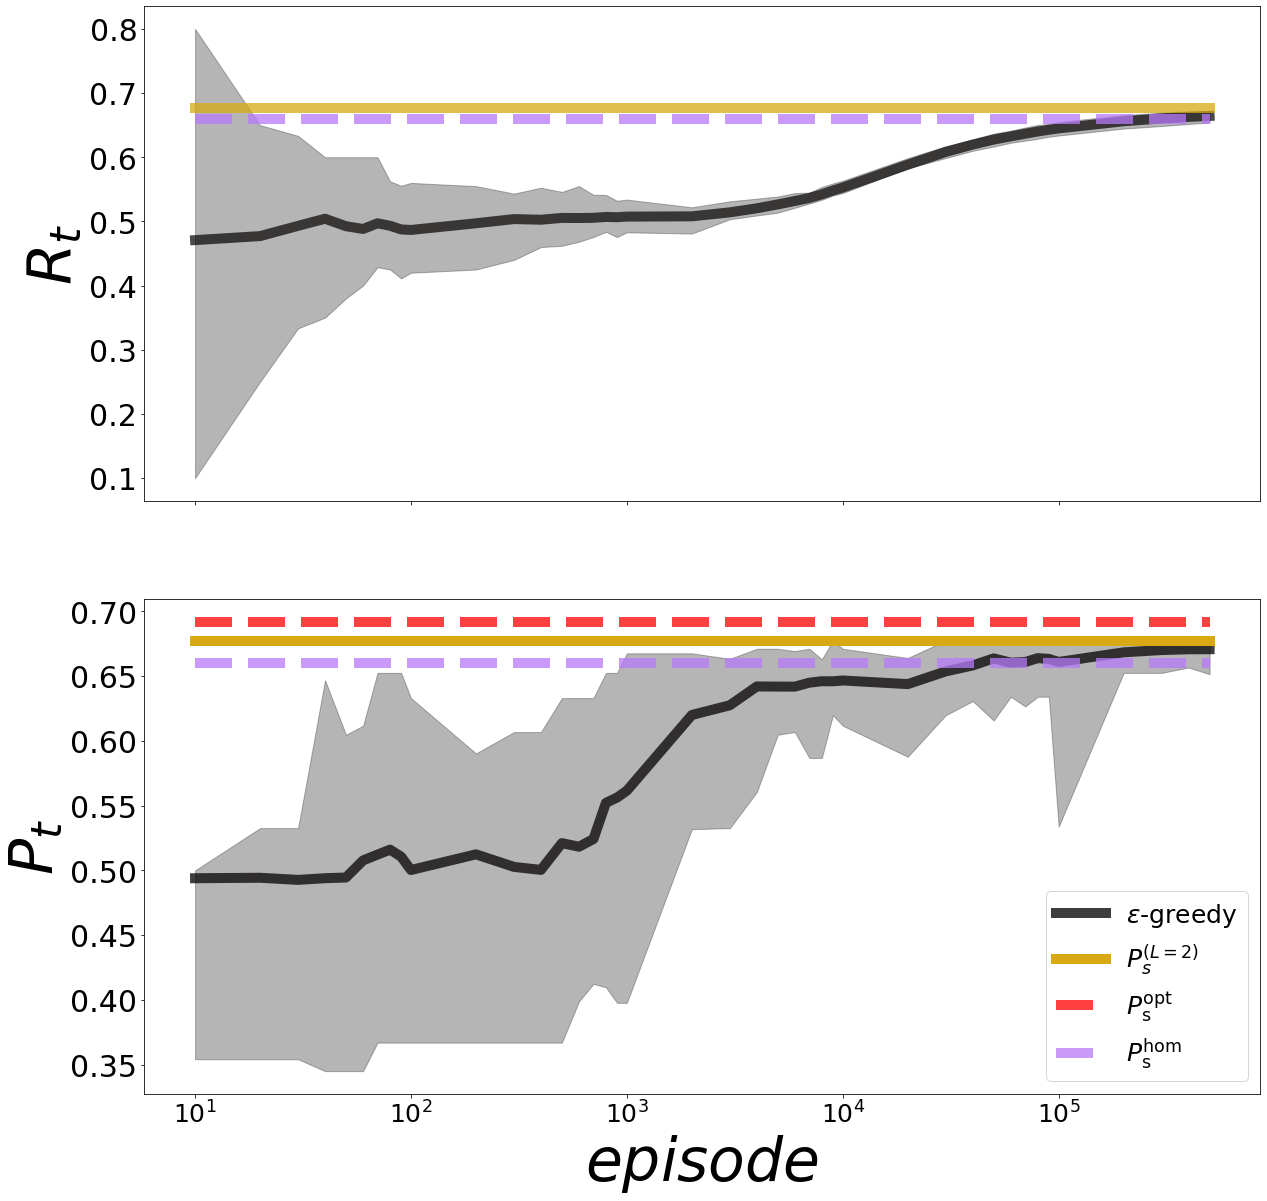

In [11]:
from agent import Agent
from scipy.special import erf

def homodyne_success(a):
    return (1+ erf(np.sqrt(2)*a))/2

def fading_homodyne_success(a, epsilon1=1e-2,epsilon2=1. ,pat0=0.5):
    return pat0*homodyne_success(np.sqrt(epsilon1)*a) + (1-pat0)*homodyne_success(np.sqrt(epsilon2)*a)


agent = Agent()

layers = 2
n_actions = 10
nrun=6
folder = "results_IEE/"+str(layers)+"L_"+str(n_actions)+"a"+"_LC"

times, rcum, pt = np.load(folder+"/run_{}/tables/learning_curves.npy".format(nrun))
min_r_cumulative, max_r_cumulative, min_pr_gre, max_pr_gre =  np.load(folder+"/run_{}/tables/minimax.npy".format(nrun))
agent = Agent(layers=layers,n_actions=n_actions)
helstrom_avg = 0.691833


ticks=[1]
for k in np.log10(times):
    if np.round(k,4) == k:
        ticks.append(10**k)
#ticks.append(10**5)
#ticks.append(5*10**5)

tickslabels=[r'$10^{1}$',r'$10^{2}$',r'$10^{3}$',r'$10^{4}$',r'$10^{5}$',r'$5 \; 10^{5}$']

st=30
al=0.75
color_pbound = "red"
plt.figure(figsize=(20,20))
plt.subplot(211)
maxdisc = 0.677452737547974
apl=0.3
ls=60

plt.plot(np.log10(times), rcum/times,  linewidth=lw, alpha=al, color=colors["1L"])
plt.fill_between(np.log10(times), min_r_cumulative/times, max_r_cumulative/times, alpha=apl,color=colors["1L"])

plt.plot(np.log10(times), np.ones(len(times))*maxdisc, linewidth=lw, alpha=al,color=colors["2L"], label=r'$P^{(L=2)}_s$')
plt.plot(np.log10(times), np.ones(len(times))*fading_homodyne_success(a=0.4),'--', linewidth=lw,alpha=al, color=colors["H"], label="Homodyne")
plt.xticks(visible=False )
plt.yticks(size=st )

plt.ylabel(r'$R_t$',size=ls)
plt.subplot(212)
plt.plot(np.log10(times),pt, linewidth=lw, alpha=0.8, color=colors["1L"], label=r'$\epsilon$'+"-greedy")
plt.fill_between(np.log10(times), min_pr_gre, max_pr_gre,  alpha=apl,color=colors["1L"])

plt.plot(np.log10(times), np.ones(len(times))*maxdisc, linewidth=lw, alpha=1, color=colors["2L"], label=r'$P^{(L=2)}_s$')
plt.plot(np.log10(times), np.ones(len(times))*helstrom_avg,'--', linewidth=lw,alpha=al, color="red", label=r'$P_{\rm s}^{\rm opt}$')
plt.plot(np.log10(times), np.ones(len(times))*fading_homodyne_success(a=0.4),'--', linewidth=lw,alpha=al, color=colors["H"], label=r'$P_{\rm s}^{\rm hom}$')

plt.yticks(size=st )
plt.xticks(ticks=np.log10(np.array(ticks))[1:],labels=tickslabels[:-1], size=25)
plt.yticks(size=st )



plt.ylabel(r'$P_t$',size=ls)
plt.xlabel(r'$episode$',size=ls)
plt.legend(prop={"size":25}, loc="lower right")
plt.savefig("paper_plots/ep-greedy_compound.pdf")

Two plots in one

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os


amps=np.linspace(0,3,100)
ind=len(amps)



channels = {}
channels[1] = [[.5,.5],[.01,1]]
channels[2] = [[.5,.5],[.9, 1.]]
channels[3] = [[.5,.5],[.5, .55]]
channels[4] = [[.5,.5],[.001, 1.]]
channels[5] = [[.5,.5],[.00001, 1.]]
channels[6] = [[.5,.5],[.000001, 1.]]
channels[7] = [[.5,.5],[.5, .9]]
channels[8] = [[.5,.5],[.3, .4]]
channels[9] = [[.5,.5],[.3, .5]]

homodynes_values = {}
fun2 = {}
s2={}
s1={}
fun1={}
helstroms_values={}
for caseid in [1,7]:

    colors={"1L":list(np.array([15,12,12])/255.),
           "2L":list(np.array([216,169,20])/255.),
           "H": list(np.array([183,121,249])/255.)}

    s2[caseid]=np.load("data_cases/{}/ar_2L_s.npy".format(caseid))
    fun2[caseid]=np.load("data_cases/{}/ar_2L_betas.npy".format(caseid))#,fun2)
    s1[caseid]=np.load("data_cases/{}/ar_1L_s.npy".format(caseid))#,s1)
    fun1[caseid]=np.load("data_cases/{}/ar_1L_betas.npy".format(caseid))#,fun1)
    homodynes_values[caseid]=np.load("data_cases/{}/homodynes.npy".format(caseid))#,homodynes_values)
    helstroms_values[caseid]=np.load("data_cases/{}/helstroms.npy".format(caseid))#,helstroms_values)


  

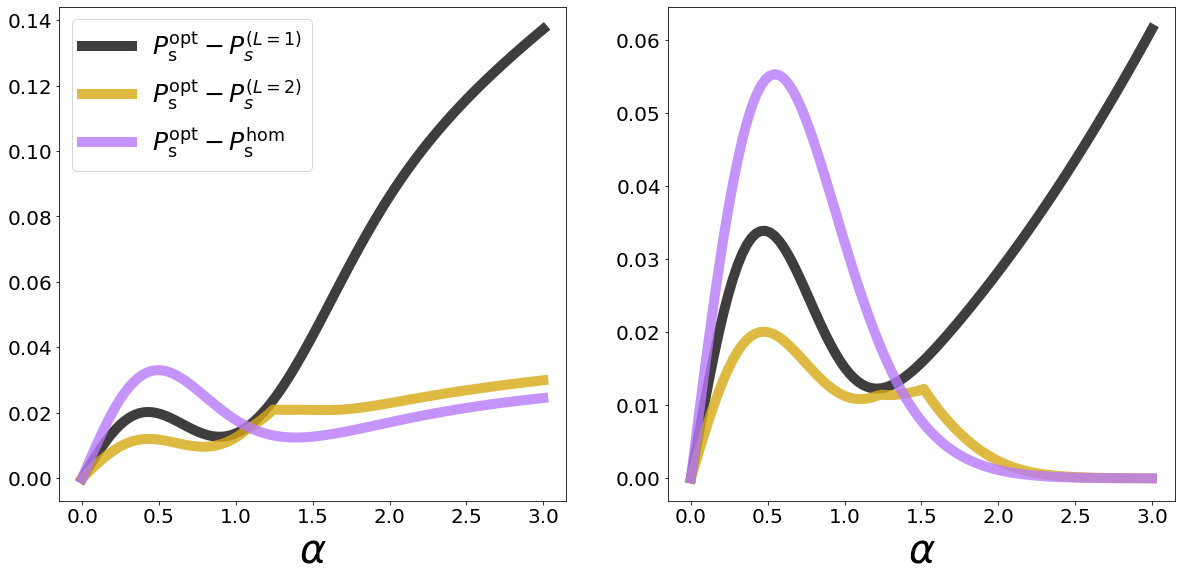

In [26]:
lw=10
al=0.8
fig1=plt.figure(figsize=(20,20))
ax1, ax2 = plt.subplot2grid((2,2),(0,0)), plt.subplot2grid((2,2),(0,1))

for caseid,ax in zip([1,7],[ax1,ax2]):
    #plt.xticks(fontsize=20)#, rotation=90)
    #plt.yticks(fontsize=20)#, rotation=90)
    ax.plot(amps,helstroms_values[caseid]-s1[caseid], color=colors["1L"], linewidth=lw,label=r'$P_{\rm s}^{\rm opt}-P^{(L=1)}_s$', alpha=al)
    ax.plot(amps,helstroms_values[caseid]-s2[caseid],color=colors["2L"], linewidth=lw, label=r'$P_{\rm s}^{\rm opt}-P^{(L=2)}_s$', alpha=al)
    ax.plot(amps,helstroms_values[caseid]-homodynes_values[caseid], color=colors["H"],  linewidth=lw,label=r'$P_{\rm s}^{\rm opt} - P_{\rm s}^{\rm hom}$', alpha=al)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel(r'$\alpha$',size=40)
    if caseid==1:
        ax.legend(prop={"size":25}, loc=0)
        
   #     ax.set_ylabel("Success probability",size=40)
    
    #os.makedirs("paper_plots",exist_ok=True)
#plt.savefig("paper_plots/joint{}.pdf".format("etas" + str(channels[1][1]) + str(channels[7][1])))


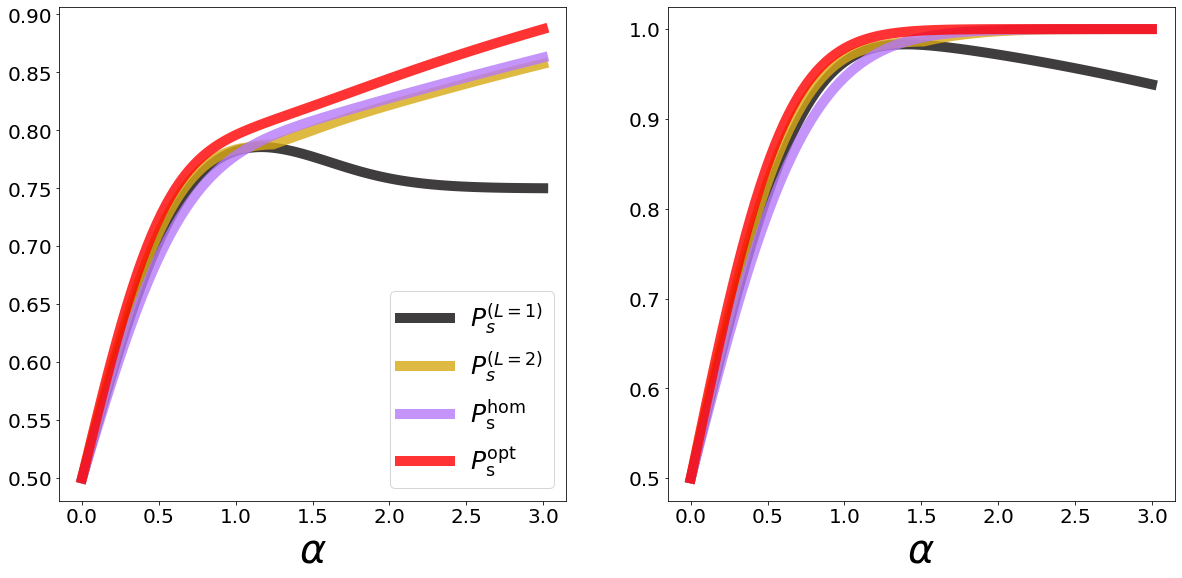

In [29]:
lw=10
al=0.8
fig1=plt.figure(figsize=(20,20))
ax1, ax2 = plt.subplot2grid((2,2),(0,0)), plt.subplot2grid((2,2),(0,1))

for caseid,ax in zip([1,7],[ax1,ax2]):
    #plt.xticks(fontsize=20)#, rotation=90)
    #plt.yticks(fontsize=20)#, rotation=90)
    ax.plot(amps,s1[caseid], color=colors["1L"], linewidth=lw,label=r'$P^{(L=1)}_s$', alpha=al)
    ax.plot(amps,s2[caseid],color=colors["2L"], linewidth=lw, label=r'$P^{(L=2)}_s$', alpha=al)
    ax.plot(amps,homodynes_values[caseid], color=colors["H"],  linewidth=lw,label=r'$P_{\rm s}^{\rm hom}$', alpha=al)
    ax.plot(amps,helstroms_values[caseid], color="red",  linewidth=lw,label=r'$P_{\rm s}^{\rm opt}$', alpha=al)
    
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel(r'$\alpha$',size=40)
    if caseid==1:
        ax.legend(prop={"size":25}, loc=0)
        
   #     ax.set_ylabel("Success probability",size=40)
    
    #os.makedirs("paper_plots",exist_ok=True)
plt.savefig("paper_plots/joint{}_real.pdf".format("etas" + str(channels[1][1]) + str(channels[7][1])))


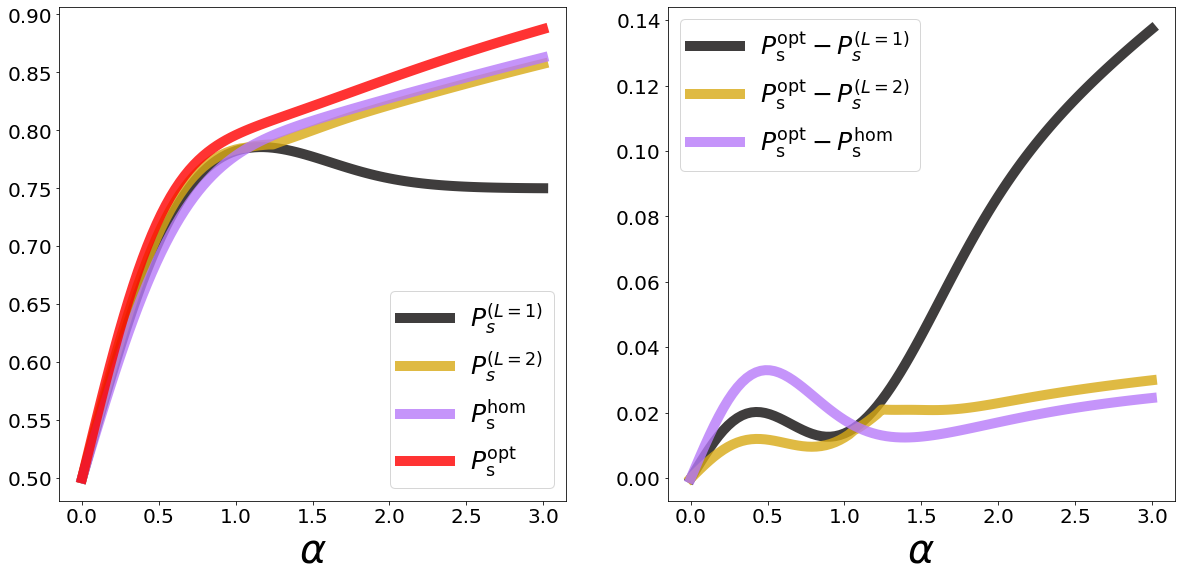

In [30]:
lw=10
al=0.8
fig1=plt.figure(figsize=(20,20))
ax1, ax2 = plt.subplot2grid((2,2),(0,0)), plt.subplot2grid((2,2),(0,1))

for caseid,ax in zip([1,1],[ax1,ax2]):
    #plt.xticks(fontsize=20)#, rotation=90)
    #plt.yticks(fontsize=20)#, rotation=90)
    if ax==ax1:
        ax.plot(amps,s1[caseid], color=colors["1L"], linewidth=lw,label=r'$P^{(L=1)}_s$', alpha=al)
        ax.plot(amps,s2[caseid],color=colors["2L"], linewidth=lw, label=r'$P^{(L=2)}_s$', alpha=al)
        ax.plot(amps,homodynes_values[caseid], color=colors["H"],  linewidth=lw,label=r'$P_{\rm s}^{\rm hom}$', alpha=al)
        ax.plot(amps,helstroms_values[caseid], color="red",  linewidth=lw,label=r'$P_{\rm s}^{\rm opt}$', alpha=al)

        ax.tick_params(axis='both', which='major', labelsize=20)
        ax.set_xlabel(r'$\alpha$',size=40)
        if caseid==1:
            ax.legend(prop={"size":25}, loc=0)

    else:
        ax.plot(amps,helstroms_values[caseid]-s1[caseid], color=colors["1L"], linewidth=lw,label=r'$P_{\rm s}^{\rm opt}-P^{(L=1)}_s$', alpha=al)
        ax.plot(amps,helstroms_values[caseid]-s2[caseid],color=colors["2L"], linewidth=lw, label=r'$P_{\rm s}^{\rm opt}-P^{(L=2)}_s$', alpha=al)
        ax.plot(amps,helstroms_values[caseid]-homodynes_values[caseid], color=colors["H"],  linewidth=lw,label=r'$P_{\rm s}^{\rm opt} - P_{\rm s}^{\rm hom}$', alpha=al)
        ax.tick_params(axis='both', which='major', labelsize=20)
        ax.set_xlabel(r'$\alpha$',size=40)
        if caseid==1:
            ax.legend(prop={"size":25}, loc=0)
    #os.makedirs("paper_plots",exist_ok=True)
plt.savefig("paper_plots/single{}_wdiffe.pdf".format("etas" + str(channels[1][1])))
